In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D ,Conv2DTranspose,Reshape,Lambda
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from keras import metrics


num_classes = 10

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
(x_train_digit, y_train_digit), (x_test_digit, y_test_digit) = mnist.load_data()

In [0]:
x_train_digit.shape

(60000, 28, 28)

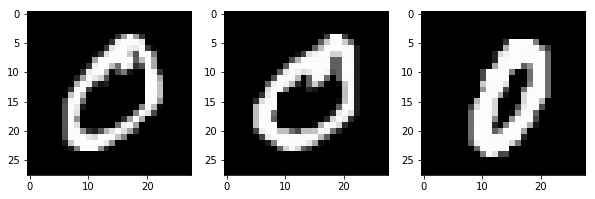

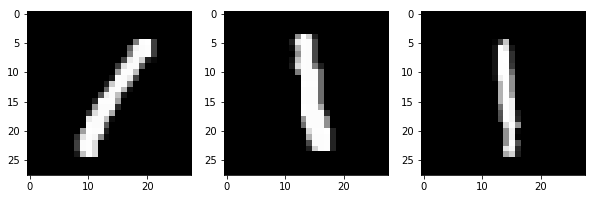

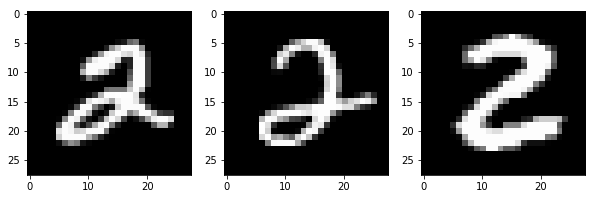

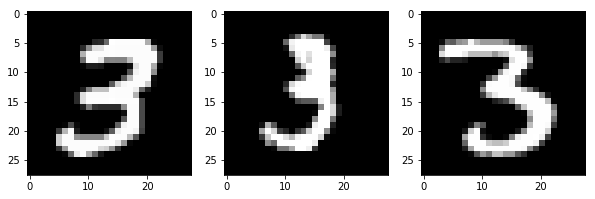

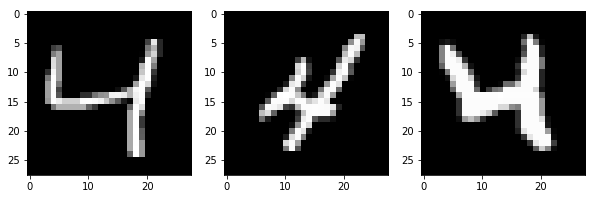

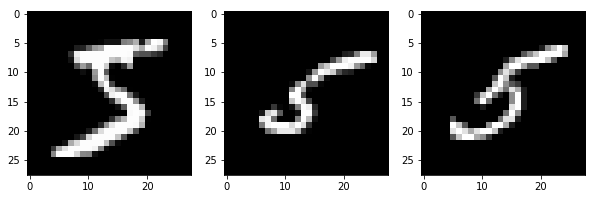

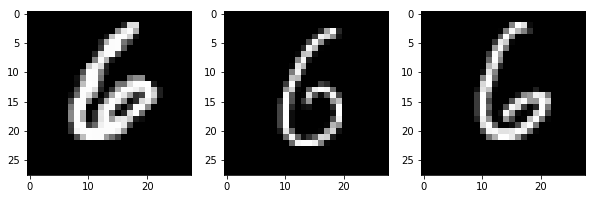

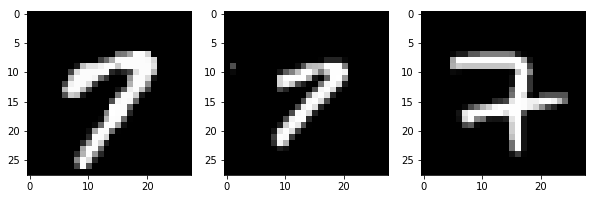

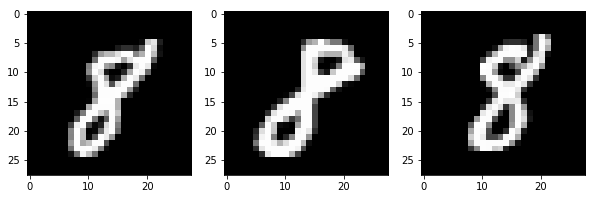

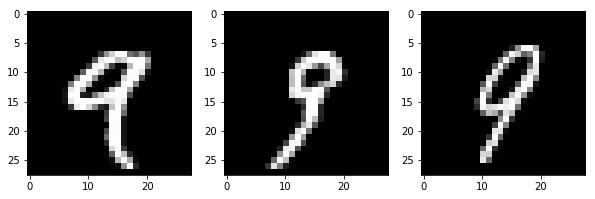

In [0]:
for i in range(10):
    index=np.where(y_train_digit==i)
    images=x_train_digit[index][:3]
    fig,axes = plt.subplots(1, 3,figsize=(10,10))
    for j in range(3):
      axes[j].imshow(images[j], cmap='gray')

In [0]:
x_train_digit.shape

(60000, 28, 28)

In [0]:
x_train_digit=x_train_digit.reshape(x_train_digit.shape[0],784)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


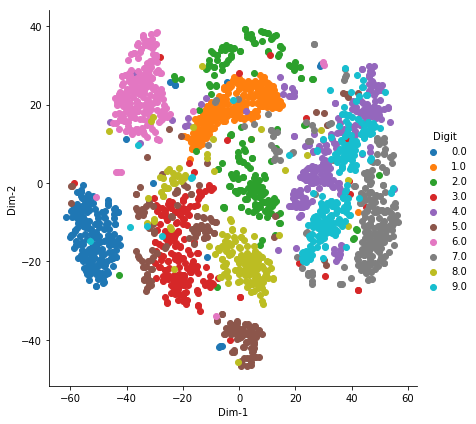

In [0]:
from sklearn.manifold import TSNE
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

model=TSNE(n_components=2,random_state=0,perplexity=50)

TSNE=model.fit_transform(x_train_digit[:2000])

TSNE=np.vstack((TSNE.T,y_train_digit[:2000])).T
DF=pd.DataFrame(data=TSNE,columns=["Dim-1","Dim-2","Digit"])

sn.FacetGrid(DF, hue="Digit", size=6).map(plt.scatter, 'Dim-1', 'Dim-2').add_legend()
plt.show()

In [0]:
x_train.shape

(60000, 28, 28, 1)

## **ENCODER ARCHITECTURE**

In [0]:
import keras
from keras.layers import Input

In [0]:
x_train.shape

(60000, 28, 28, 1)

In [0]:
from keras.layers import Input
from keras.layers import MaxPool2D
from keras.layers import Conv2D,Dense,Conv2DTranspose
from keras.models import Model

image_input=Input(shape=input_shape)

x=Conv2D(32, (3, 3), padding='same',activation='relu',name='Conv_1',strides=(1,1))(image_input)
x=Conv2D(64, (3, 3), padding='same',activation='relu',name='Conv_2',strides=(2,2))(x)
x=Conv2D(64, (3, 3), padding='same',activation='relu',name='Conv_3',strides=(2,2))(x)
x=Conv2D(64, (3, 3), padding='same',activation='relu',name='Conv_4',strides=(1,1))(x)
x = Flatten()(x)

latent_output=Dense(2, name='encoder_output')(x)

encoder=Model(image_input,latent_output)


In [0]:
encoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
Conv_1 (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
Conv_2 (Conv2D)              (None, 14, 14, 64)        18496     
_________________________________________________________________
Conv_3 (Conv2D)              (None, 7, 7, 64)          36928     
_________________________________________________________________
Conv_4 (Conv2D)              (None, 7, 7, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
encoder_output (Dense)       (None, 2)                 6274

In [0]:

latent_input=Input(shape=(2,))
output=Dense(7*7*64, name='encoder_output')(latent_input)
x=Reshape(target_shape=(7,7,64))(output)
x=Conv2DTranspose(64, (3, 3), padding='same',activation='relu',name='Conv_1',strides=(1,1))(x)
x=Conv2DTranspose(64, (3, 3), padding='same',activation='relu',name='Conv_2',strides=(2,2))(x)
x=Conv2DTranspose(32, (3, 3), padding='same',activation='relu',name='Conv_3',strides=(2,2))(x)
output=Conv2DTranspose(1, (3, 3), padding='same',activation='relu',name='Conv_4',strides=(1,1))(x)

decoder=Model(latent_input,output)

In [0]:
decoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
encoder_output (Dense)       (None, 3136)              9408      
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
Conv_1 (Conv2DTranspose)     (None, 7, 7, 64)          36928     
_________________________________________________________________
Conv_2 (Conv2DTranspose)     (None, 14, 14, 64)        36928     
_________________________________________________________________
Conv_3 (Conv2DTranspose)     (None, 28, 28, 32)        18464     
_________________________________________________________________
Conv_4 (Conv2DTranspose)     (None, 28, 28, 1)         289 

In [0]:

decoder_output=decoder(latent_output)
main_model=Model(image_input,decoder_output)

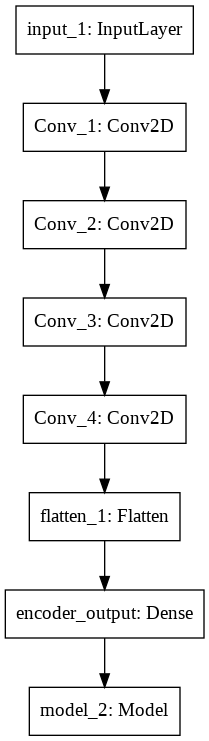

In [0]:
from keras.utils import plot_model
plot_model(main_model, to_file='model.png')

In [0]:

main_model.compile(optimizer=keras.optimizers.Adam(lr=0.001), loss ='binary_crossentropy')



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
main_model.fit(x = x_train,y = x_train,batch_size =32,shuffle = True,epochs = 10)




Epoch 1/10





60000/60000 [==============================] - 218s 4ms/step - loss: 0.2363
Epoch 2/10
60000/60000 [==============================] - 217s 4ms/step - loss: 0.2236
Epoch 3/10
60000/60000 [==============================] - 220s 4ms/step - loss: 0.2129
Epoch 4/10
60000/60000 [==============================] - 219s 4ms/step - loss: 0.2043
Epoch 5/10
60000/60000 [==============================] - 218s 4ms/step - loss: 0.2015
Epoch 6/10
60000/60000 [==============================] - 219s 4ms/step - loss: 0.2019
Epoch 7/10
60000/60000 [==============================] - 218s 4ms/step - loss: 0.2037
Epoch 8/10
60000/60000 [==============================] - 218s 4ms/step - loss: 0.2022
Epoch 9/10
60000/60000 [==============================] - 219s 4ms/step - loss: 0.1967
Epoch 10/10
60000/60000 [==============================] - 218s 4ms/step - loss: 0.2029


**VISUALIZING OUTPUT**

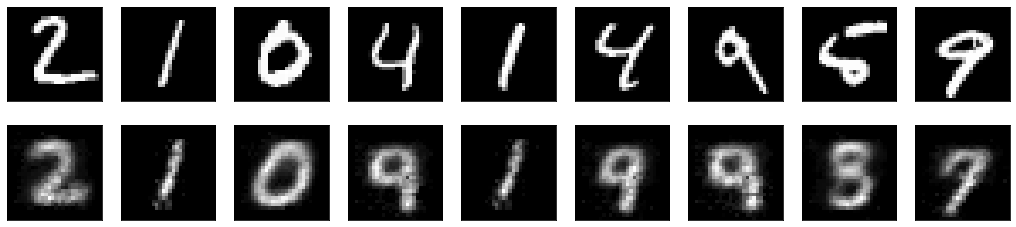

In [0]:
decoded_imgs = main_model.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1,n):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

**VISUALIZING LATENT SPACE**

In [0]:
output=output.reshape(60000,28,28)

In [0]:
output.shape

(60000, 28, 28)

In [0]:
output=output.reshape(output.shape[0],784)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


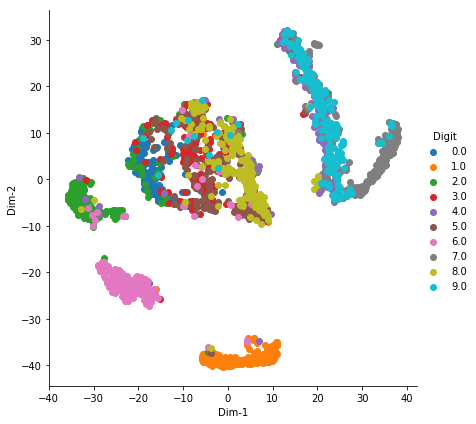

In [0]:
from sklearn.manifold import TSNE
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

model=TSNE(n_components=2,random_state=0,perplexity=75)

TSNE=model.fit_transform(output[:2000])

TSNE=np.vstack((TSNE.T,y_train_digit[:2000])).T
DF=pd.DataFrame(data=TSNE,columns=["Dim-1","Dim-2","Digit"])

sn.FacetGrid(DF, hue="Digit", size=6).map(plt.scatter, 'Dim-1', 'Dim-2').add_legend()
plt.show()

## **VARIATIONAL AUTOENCODER**

**ENCODER**

In [0]:
def sampling(args):
    mu, log_var = args
    epsilon = K.random_normal(shape=K.shape(mu), mean=0., stddev=1.)
    return mu + K.exp(log_var / 2) * epsilon

In [0]:
input_shape

(28, 28, 1)

In [0]:
from keras.layers import Input
from keras.layers import MaxPool2D
from keras.layers import Conv2D,Dense,Conv2DTranspose,BatchNormalization,Dropout
from keras.models import Model

image_input=Input(shape=input_shape)

x=Conv2D(32, (3, 3), padding='same',activation='relu',name='Conv_1',strides=(1,1))(image_input)
x=BatchNormalization()(x)
x=Dropout(0.3)(x)
x=Conv2D(64, (3, 3), padding='same',activation='relu',name='Conv_2',strides=(2,2))(x)
x=BatchNormalization()(x)
x=Dropout(0.3)(x)
x=Conv2D(64, (3, 3), padding='same',activation='relu',name='Conv_3',strides=(2,2))(x)
x=BatchNormalization()(x)
x=Dropout(0.3)(x)
x=Conv2D(64, (3, 3), padding='same',activation='relu',name='Conv_4',strides=(1,1))(x)
x = Flatten()(x)
mean_v=Dense(2, name='mean_output')(x)
std_v=Dense(2, name='variance_output')(x)

encoder_output = Lambda(sampling, name='encoder_output')([mean_v,std_v])

encoder=Model(image_input,encoder_output)


In [0]:
encoder.summary()

Model: "model_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
Conv_1 (Conv2D)                 (None, 28, 28, 32)   320         input_10[0][0]                   
__________________________________________________________________________________________________
batch_normalization_8 (BatchNor (None, 28, 28, 32)   128         Conv_1[0][0]                     
__________________________________________________________________________________________________
dropout_7 (Dropout)             (None, 28, 28, 32)   0           batch_normalization_8[0][0]      
___________________________________________________________________________________________

In [0]:
sample=x_train[0].reshape(1,28,28,1)

In [0]:
result=encoder.predict(sample)

In [0]:

latent_input=Input(shape=(2,))
output=Dense(7*7*64, name='encoder_output')(latent_input)
x=Reshape(target_shape=(7,7,64))(output)
x=Conv2DTranspose(64, (3, 3), padding='same',activation='relu',name='Conv_1',strides=(1,1))(x)
x=Conv2DTranspose(64, (3, 3), padding='same',activation='relu',name='Conv_2',strides=(2,2))(x)
x=Conv2DTranspose(32, (3, 3), padding='same',activation='relu',name='Conv_3',strides=(2,2))(x)
output=Conv2DTranspose(1, (3, 3), padding='same',activation='relu',name='Conv_4',strides=(1,1))(x)

decoder=Model(latent_input,output)

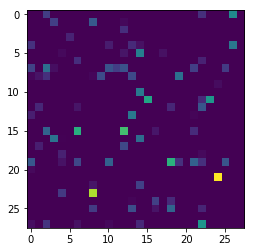

In [0]:
plt.imshow(decoder.predict(result).reshape(28,28))

In [0]:
decoder.summary()

Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 2)                 0         
_________________________________________________________________
encoder_output (Dense)       (None, 3136)              9408      
_________________________________________________________________
reshape_5 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
Conv_1 (Conv2DTranspose)     (None, 7, 7, 64)          36928     
_________________________________________________________________
Conv_2 (Conv2DTranspose)     (None, 14, 14, 64)        36928     
_________________________________________________________________
Conv_3 (Conv2DTranspose)     (None, 28, 28, 32)        18464     
_________________________________________________________________
Conv_4 (Conv2DTranspose)     (None, 28, 28, 1)         289

In [0]:
decoder_output=decoder(encoder_output)
main_model=Model(image_input,decoder_output)

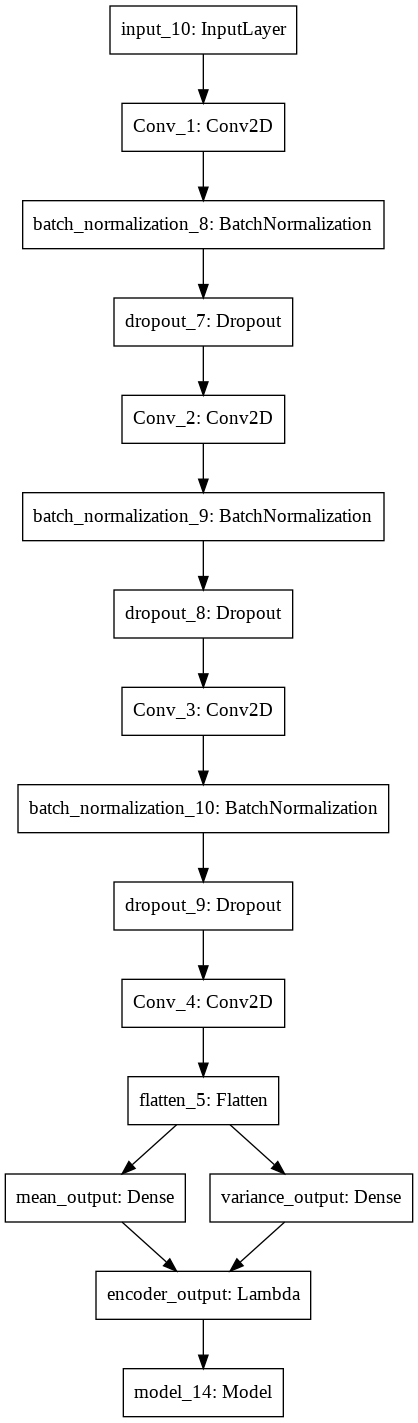

In [0]:
from keras.utils import plot_model
plot_model(main_model, to_file='model.png')

**LOSS FUNCTIONS**

In [0]:
def vae_loss(x, x_decoded_mean):
    xent_loss =keras.losses.binary_crossentropy(K.flatten(x), K.flatten(x_decoded_mean))
    xent_loss *= 28 * 28
    kl_loss =  -0.5 * K.sum(1 + std_v - K.square(mean_v) - K.exp(std_v), axis = 1)
    return xent_loss + kl_loss

In [0]:
main_model.compile(optimizer=keras.optimizers.Adam(lr=0.001), loss=vae_loss)

In [0]:
x_train.shape

(60000, 28, 28, 1)

In [0]:
from keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.5,
                              patience=2, min_lr=0.000001)

In [0]:
main_model.fit(x = x_train,y = x_train,batch_size=32,shuffle = True,epochs =5)

Epoch 1/5
60000/60000 [==============================] - 308s 5ms/step - loss: 191.9473
Epoch 2/5
60000/60000 [==============================] - 313s 5ms/step - loss: 176.0926
Epoch 3/5
60000/60000 [==============================] - 312s 5ms/step - loss: 178.6220
Epoch 4/5
60000/60000 [==============================] - 312s 5ms/step - loss: 168.3271
Epoch 5/5
60000/60000 [==============================] - 309s 5ms/step - loss: 170.3156


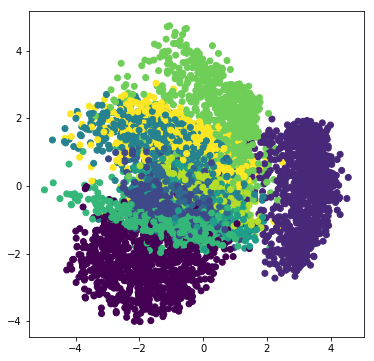

In [0]:
x_test_encoded = encoder.predict(x_test)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test_digit,cmap='viridis')
plt.show()

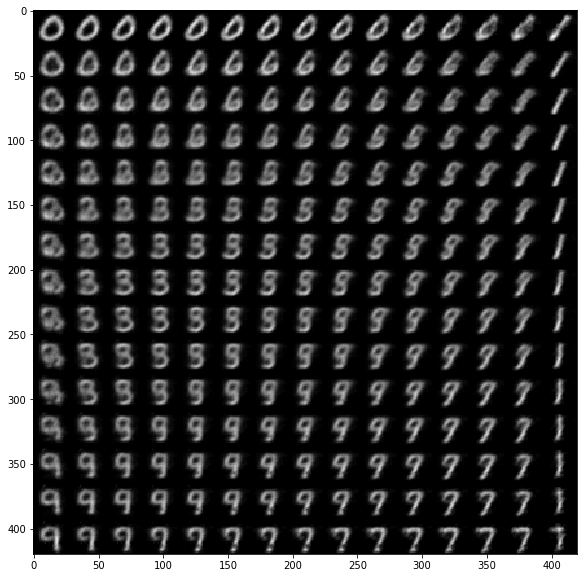

In [0]:
n = 15  # figure with 15x15 digits
digit_size = 28

# linearly spaced coordinates on the unit square were transformed
# through the inverse CDF (ppf) of the Gaussian to produce values
# of the latent variables z, since the prior of the latent space
# is Gaussian

z1 = norm.ppf(np.linspace(0.01, 0.99, n))
z2 = norm.ppf(np.linspace(0.01, 0.99, n))
z_grid = np.dstack(np.meshgrid(z1, z2))

x_pred_grid = decoder.predict(z_grid.reshape(n*n, 2)) \
                     .reshape(n, n, digit_size, digit_size)

plt.figure(figsize=(10, 10))
plt.imshow(np.block(list(map(list, x_pred_grid))), cmap='gray')
plt.show()

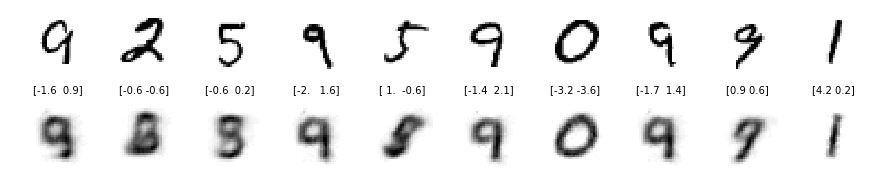

In [0]:
n_to_show = 10
example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]

z_points = encoder.predict(example_images)

reconst_images = decoder.predict(z_points)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(n_to_show):
    img = example_images[i].squeeze()
    sub = fig.add_subplot(2, n_to_show, i+1)
    sub.axis('off')
    sub.text(0.5, -0.35, str(np.round(z_points[i],1)), fontsize=10, ha='center', transform=sub.transAxes)
            
    sub.imshow(img, cmap='gray_r')

for i in range(n_to_show):
    img = reconst_images[i].squeeze()
    sub = fig.add_subplot(2, n_to_show, i+n_to_show+1)
    sub.axis('off')
    sub.imshow(img, cmap='gray_r')